# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [57]:
import pandas as pd

import matplotlib.pyplot as plt 
import numpy as np

In [58]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [59]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [61]:
df.dropna().describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [62]:
# Check for Null values 
df.isnull().mean()

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [63]:
# Check for duplicates 
df.drop_duplicates(inplace=True)

In [64]:
# Check for duplicates 
df.duplicated().sum()

0

In [65]:
df.shape

(41176, 21)

In [66]:
# Check unique values in categorical columns (not numerical)
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper())
        print('=====================================')
        print(df[column].unique() ,"\n\n\n")

JOB
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 



MARITAL
['married' 'single' 'divorced' 'unknown'] 



EDUCATION
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 



DEFAULT
['no' 'unknown' 'yes'] 



HOUSING
['no' 'yes' 'unknown'] 



LOAN
['no' 'yes' 'unknown'] 



CONTACT
['telephone' 'cellular'] 



MONTH
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 



DAY_OF_WEEK
['mon' 'tue' 'wed' 'thu' 'fri'] 



POUTCOME
['nonexistent' 'failure' 'success'] 



Y
['no' 'yes'] 





In [67]:
# Find all columns with nulls 
def unknown(data_frame):
    columns = data_frame.columns

    presence_list = []
    for i in columns:
        if 'unknown' in data_frame[i].unique():
            presence_list.append(i)
    return presence_list

unknowns = unknown(df)
unknowns

/var/folders/74/f1wcwdvn5sxdtw5bkxh43hmw0000gn/T/ipykernel_50654/3763968706.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in data_frame[i].unique():


['job', 'marital', 'education', 'default', 'housing', 'loan']

In [68]:
for i in unknowns:
    precentage = len(df[df[i] == 'unknown']) /len(df[i]) * 100
    print(i.upper() , f'\n=========================================\n{str(precentage)}' + '%' '\n\n\n' )

JOB 
0.8014377307169226%



MARITAL 
0.19428793471925393%



EDUCATION 
4.2014765883038665%



DEFAULT 
20.876238585583835%



HOUSING 
2.4043131921507674%



LOAN 
2.4043131921507674%





In [69]:
#droppint missing values 
unknowns = unknown(df)
for i in unknowns[:3]:
    df.drop(df[df[i]  == 'unknown'].index, inplace = True )

/var/folders/74/f1wcwdvn5sxdtw5bkxh43hmw0000gn/T/ipykernel_50654/3763968706.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'unknown' in data_frame[i].unique():


In [70]:
# creating a function to see distribution of all features 
def plot_distributions(df):
    plt.figure(figsize=(28,40))
    b = 0 
    for i in df.columns:
        b+=1
        plt.subplot(6,6,b)
        plt.hist(df[i])
        plt.title(i)
        
# create function to visualize distribution of one feature 
def plot_idividual( column_name,df= df):
    plt.figure(figsize=(15,10))
    plt.hist(df[column_name])
    plt.title(column_name)

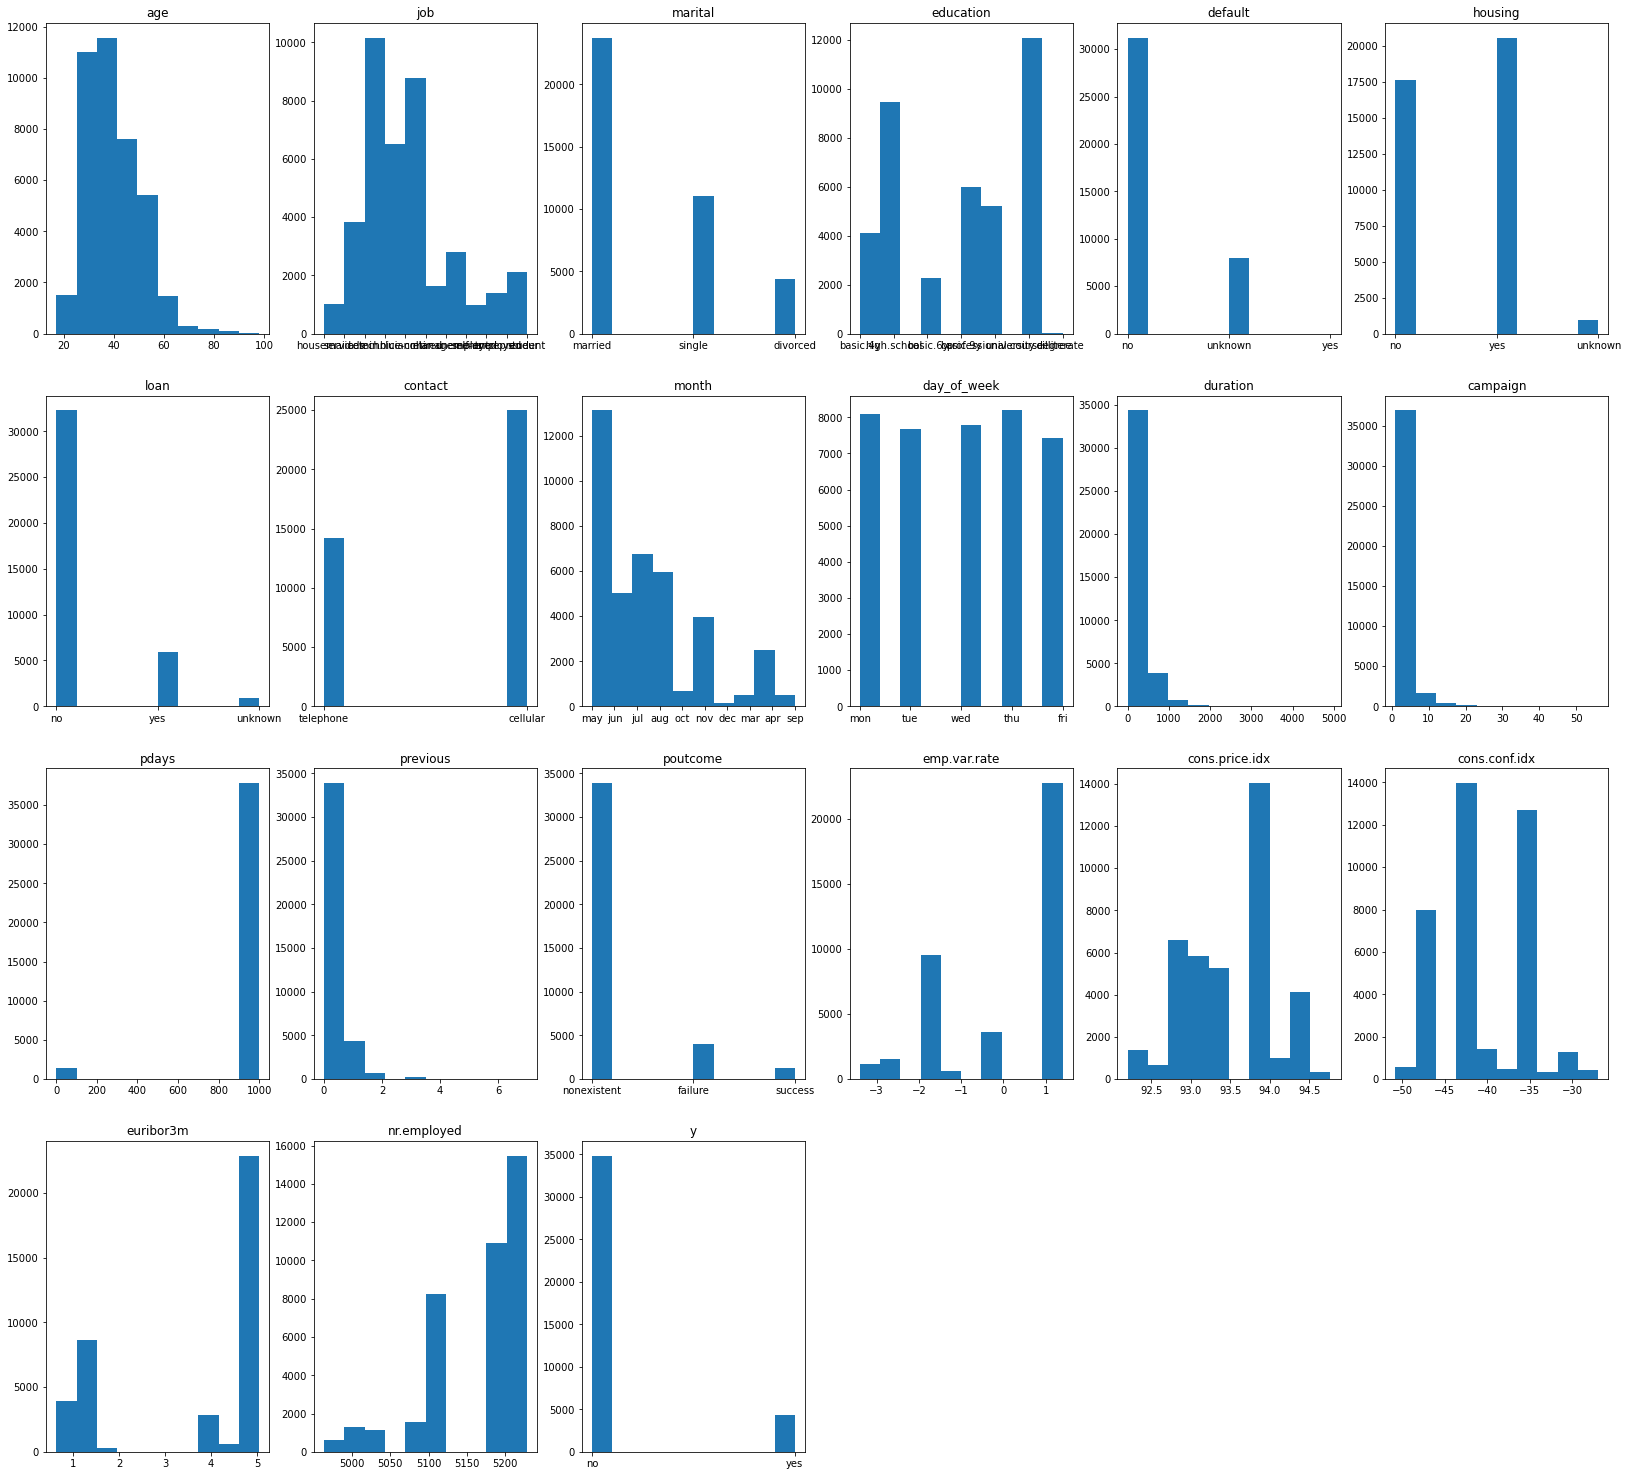

In [71]:
# Plot distibutio of features 
plot_distributions(df)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [72]:
# Get count of each value in term_deposit
term_deposit = np.array([len(df[df['y']== 'no']), len(df[df['y'] == 'yes'])])
mylabel = ['no','yes']
# Get precentage of each value 
myprec = np.array([str(round(term_deposit[0] / len(df['y']) * 100,2)) + '%', 
                    str(round(term_deposit[1] / len(df['y'])* 100,2)) + '%'])

Text(0.5, 1.0, 'Term deposit results')

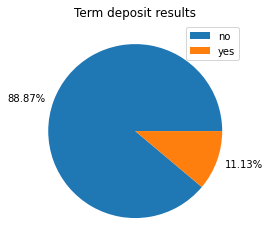

In [73]:
# Visualize yes & no distribution

plt.pie(term_deposit, labels = myprec)
plt.legend(mylabel)
plt.title('Term deposit results')

In [74]:
# data preprocessing with one-hot encoding
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split


# dataset balancing
data_positive = pd.DataFrame(df[df['y'] == 'yes'])
data_negative  = pd.DataFrame(df[df['y'] == 'no'][:len(data_positive)])

data_balanced = pd.concat([data_negative,data_positive]).sample(frac=1 , random_state= 42).reset_index(drop = True)

# Shuffle the data
data_shuffled =  data_balanced.sample(frac=1, random_state = 42).reset_index(drop = True)

# Create X, y values 
X = data_shuffled.drop(['y','duration','day_of_week'], axis = 1 )
y = pd.get_dummies(data_shuffled['y'])['yes']


def scale_one(X,y):
    # Create a column transformer  
    ct = make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore'),['job','marital','education','default','housing','loan','contact','month','poutcome']),
        (MinMaxScaler(),['age']), # Transforms data in values between 0 and 1
        (StandardScaler(), ['campaign','pdays', 'previous']),
        remainder = 'passthrough')# We use RobustScalar because we assume high level of outliers because of higly skewed data. It works with quartiles 

    

    # Split the data in train and test sets 
    X_train , X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

    # Fit column transformer 
    
    ct.fit(X_train)
    

    # Transform the data
    X_train_transformed = pd.DataFrame(ct.transform(X_train)) 
    print(X_train_transformed)
    X_test_transformed  = pd.DataFrame(ct.transform(X_test))
    return  X_train_transformed,  X_test_transformed, y_train, y_test 

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [75]:
X_train_one, X_test_one, y_train_one, y_test_one = scale_one(X, y)

       0    1    2    3    4    5    6    7    8    9   ...   43        44  \
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.148148   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.209877   
2     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.259259   
3     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.234568   
4     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.074074   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
6969  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.370370   
6970  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.271605   
6971  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.456790   
6972  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.209877   
6973  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.271605   

            45        46        47   48      49    50     51   

In [76]:
cor  =  X_train_one.corr()
cor.style.background_gradient('coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,1.000000,-0.312790,-0.109740,-0.099582,-0.162621,-0.150744,-0.107031,-0.191159,-0.099316,-0.245012,-0.100638,0.016780,-0.120260,0.119346,-0.192398,-0.107023,-0.156600,0.125553,-0.009997,-0.165310,0.316854,0.141099,-0.141099,-0.031106,-0.020172,0.037711,-0.014276,-0.020172,0.024691,0.108380,-0.108380,0.055542,0.056122,-0.011122,0.026981,0.026597,0.028109,-0.111432,0.021317,0.009309,0.027148,0.020256,-0.063596,0.062483,-0.119120,-0.000890,-0.065762,0.061928,-0.111722,-0.077115,-0.038819,-0.115136,-0.103889
1,-0.312790,1.000000,-0.098519,-0.089400,-0.145993,-0.135331,-0.096087,-0.171613,-0.089161,-0.219961,-0.090348,-0.056361,0.137146,-0.110167,0.237301,0.250641,0.361827,-0.172894,-0.008975,-0.109559,-0.337497,-0.206862,0.206862,0.021455,0.003091,-0.022451,-0.001992,0.003091,0.000700,-0.200379,0.200379,-0.075030,-0.099976,-0.034426,-0.021535,-0.016699,-0.043293,0.207655,-0.059677,-0.076117,-0.077502,-0.063632,0.135023,-0.115414,-0.026389,0.017229,0.120360,-0.126475,0.212180,0.149422,-0.000465,0.213660,0.211756
2,-0.109740,-0.098519,1.000000,-0.031365,-0.051221,-0.047480,-0.033711,-0.060209,-0.031281,-0.077171,-0.031698,-0.018553,0.060819,-0.053343,-0.001145,0.015756,0.002581,-0.030095,-0.003149,-0.042886,0.050032,0.002580,-0.002580,0.015568,-0.007188,-0.013189,0.035024,-0.007188,-0.034232,-0.036585,0.036585,-0.008531,-0.013828,-0.010131,-0.008557,0.006960,-0.031945,0.029300,0.015484,-0.022271,-0.006311,-0.018798,0.042837,-0.037778,0.023103,-0.004397,0.041242,-0.039936,0.041630,0.015762,-0.009435,0.050640,0.057990
3,-0.099582,-0.089400,-0.031365,1.000000,-0.046479,-0.043085,-0.030591,-0.054636,-0.028386,-0.070028,-0.028764,0.022805,0.033734,-0.052646,0.160625,0.000668,-0.033982,-0.009184,-0.002857,-0.036150,-0.051760,-0.017213,0.017213,0.032979,0.008671,-0.035799,-0.003041,0.008671,-0.000768,-0.026626,0.026626,0.010550,-0.012343,0.019230,-0.009783,-0.005678,-0.008039,0.010468,0.011485,-0.012988,-0.006492,-0.007917,0.007810,-0.003134,0.088609,-0.021148,0.001527,-0.008496,0.007612,0.010588,0.032072,0.010054,0.002444
4,-0.162621,-0.145993,-0.051221,-0.046479,1.000000,-0.070359,-0.049956,-0.089222,-0.046355,-0.114358,-0.046972,0.026559,0.042651,-0.064977,-0.060764,-0.028317,-0.076280,-0.098892,-0.004666,-0.084181,0.270556,0.027642,-0.027642,0.020264,0.004473,-0.021716,0.008641,0.004473,-0.011349,-0.002221,0.002221,-0.020378,-0.014672,-0.021394,-0.005232,0.001374,-0.007078,0.000595,0.040685,0.011777,0.012921,-0.004858,0.000167,0.003853,0.046691,0.017644,-0.002279,0.000897,0.004995,-0.005360,0.012649,0.012464,0.010627
5,-0.150744,-0.135331,-0.047480,-0.043085,-0.070359,1.000000,-0.046308,-0.082706,-0.042970,-0.106007,-0.043542,0.086185,0.065446,-0.131360,0.229388,-0.032790,-0.063493,-0.030577,0.030997,0.012531,-0.076509,0.006690,-0.006690,-0.011839,-0.003194,0.012878,0.014992,-0.003194,-0.014599,0.131106,-0.131106,0.057001,0.055766,0.072951,0.021437,-0.016476,0.031372,-0.155686,0.057598,0.088455,0.042428,0.049144,-0.105420,0.090560,0.532043,-0.014672,-0.090757,0.092492,-0.174669,-0.115773,0.062161,-0.172387,-0.182197
6,-0.107031,-0.096087,-0.033711,-0.030591,-0.049956,-0.046308,1.000000,-0.058723,-0.030509,-0.075266,-0.030915,-0.013232,-0.018770,0.029671,-0.035884,-0.032680,-0.009622,-0.069676,0.045168,0.003449,0.110517,-0.003969,0.003969,0.001631,-0.000872,-0.001343,-0.004863,-0.000872,0.005622,0.006586,-0.006586,0.021466,-0.027628,0.007262,0.000063,0.012835,0.017782,-0.005699,0.001682,-0.012183,0.000078,-0.013552,0.035483,-0.032980,-0.016341,0.009266,0.036448,-0.037539,-0.000949,-0.007657,-0.024724,0.002713,0.010027
7,-0.191159,-0.171613,-0.060209,-0.054636,-0.089222,-0.082706,-0.058723,1.000000,-0.054490,-0.134427,-0.055215,0.028864,-0.013116,-0.005819,-0.085002,-0.011289,-0.038416,0.346089,-0.005485,-0.060236,-0.182869,-0.035887,0.035887,0.017534,0.007689,-0.020046,-0.007060,0.007689

In [77]:
X_train_one = X_train_one.drop([18,20,22,24], axis = 1)
X_test_one = X_test_one.drop([18,20,22,24], axis = 1)

In [78]:
X_train_one.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 19, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
            38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52],
           dtype='int64')

In [79]:
# data preprocessing with label encoding 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split


# dataset balancing
data_positive = pd.DataFrame(df[df['y'] == 'yes'])
data_negative  = pd.DataFrame(df[df['y'] == 'no'][:len(data_positive)])

data_balanced = pd.concat([data_negative,data_positive]).sample(frac=1 , random_state= 42).reset_index(drop = True)

# Shuffle the data
data_shuffled =  data_balanced.sample(frac=1, random_state = 42).reset_index(drop = True)

# Create X, y values 
X = data_shuffled.drop(['y','duration','day_of_week'], axis = 1 )
y = pd.get_dummies(data_shuffled['y'])['yes']


def scale_label(X,y):
    # Create a column transformer 
    labelencoder = LabelEncoder()
    categorical  = ['job','marital','education','default','housing','loan','contact','month','poutcome']  # incode categorical data 
    for i in categorical:
        X[i] = labelencoder.fit_transform(X[i])
        
    
    ct = make_column_transformer(
        (MinMaxScaler(),['age']), # Transforms data in values between 0 and 1
        (StandardScaler(), ['campaign','pdays', 'previous',]),
        remainder = 'passthrough')

    

    # Split the data in train and test sets 
    X_train , X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

    # Fit column transformer 
    
    ct.fit(X_train)
    

    # Transform the data
    X_train_transformed = pd.DataFrame(ct.transform(X_train)) 
    print(X_train_transformed)
    X_test_transformed  = pd.DataFrame(ct.transform(X_test))
    return  X_train_transformed,  X_test_transformed, y_train, y_test 

In [80]:
X_train_removed, X_test_removed, y_train_removed, y_test_removed = scale_label(X, y)

            0         1         2         3    4    5    6    7    8    9   \
0     0.234568  0.905617  0.330829 -0.368402  1.0  2.0  0.0  0.0  2.0  0.0   
1     0.246914 -0.592550  0.330829 -0.368402  1.0  1.0  0.0  0.0  2.0  0.0   
2     0.246914 -0.093161 -3.019079  4.413050  0.0  2.0  3.0  0.0  0.0  0.0   
3     0.172840  0.905617  0.330829 -0.368402  1.0  2.0  3.0  1.0  2.0  0.0   
4     0.222222 -0.592550  0.330829 -0.368402  5.0  1.0  5.0  0.0  0.0  0.0   
...        ...       ...       ...       ...  ...  ...  ...  ...  ...  ...   
6969  0.246914  0.905617  0.330829 -0.368402  4.0  1.0  6.0  0.0  0.0  0.0   
6970  0.481481 -0.592550  0.330829 -0.368402  7.0  1.0  0.0  1.0  2.0  2.0   
6971  0.222222 -0.592550  0.330829 -0.368402  1.0  1.0  2.0  0.0  2.0  0.0   
6972  0.345679 -0.093161 -3.032586  2.819233  4.0  1.0  6.0  0.0  0.0  0.0   
6973  0.197531  0.406228  0.330829  1.225416  1.0  2.0  1.0  0.0  2.0  0.0   

       10   11   12   13      14    15     16      17  
0     1

In [81]:
# See corelation between different variables 
cor  = X_train_removed.corr()
cor.style.background_gradient('coolwarm')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.000000,0.005101,-0.071505,0.065794,-0.012946,-0.410220,-0.188202,0.137528,0.023175,-0.001554,-0.019516,-0.017568,0.042892,-0.059288,-0.034703,0.107272,-0.058126,-0.080521
1,0.005101,1.000000,0.074306,-0.075864,-0.013141,-0.026529,-0.006888,0.029678,-0.002963,-0.016303,0.097564,-0.007607,-0.026949,0.136145,0.092359,0.000231,0.131590,0.133516
2,-0.071505,0.074306,1.000000,-0.764164,-0.035497,-0.045711,-0.101593,0.145547,-0.036528,-0.009946,0.349383,0.061338,-0.700029,0.424154,0.147704,-0.031116,0.476188,0.540924
3,0.065794,-0.075864,-0.764164,1.000000,0.049073,0.048535,0.105684,-0.159757,0.045018,-0.008741,-0.393474,-0.063397,0.237646,-0.454255,-0.145958,-0.022738,-0.520026,-0.585751
4,-0.012946,-0.013141,-0.035497,0.049073,1.000000,0.050609,0.113118,-0.042750,0.001992,-0.005246,-0.066788,-0.003936,-0.001568,-0.070717,-0.050585,0.005116,-0.071987,-0.075648
5,-0.410220,-0.026529,-0.045711,0.048535,0.050609,1.000000,0.142427,-0.072033,0.008838,0.015781,-0.124495,-0.045393,0.014082,-0.135516,-0.094928,-0.065357,-0.139520,-0.120502
6,-0.188202,-0.006888,-0.101593,0.105684,0.113118,0.142427,1.000000,-0.245079,0.020757,-0.016978,-0.188352,-0.102274,0.045791,-0.175625,-0.131449,-0.053948,-0.178914,-0.161687
7,0.137528,0.029678,0.145547,-0.159757,-0.042750,-0.072033,-0.245079,1.000000,-0.023520,-0.004910,0.269712,0.108972,-0.037628,0.296290,0.203932,0.087860,0.303614,0.280494
8,0.023175,-0.002963,-0.036528,0.045018,0.001992,0.008838,0.020757,-0.023520,1.000000,0.045529,-0.093508,-0.062684,0.011934,-0.086816,-0.067476,-0.047483,-0.091838,-0.078820
9,-0.001554,-0.016303,-0.009946,-0.008741,-0.005246,0.015781,-0.016978,-0.004910,0.045529,1.000000,-0.001126,-0.003780,0.009684,0.010828,0.017837,-0.024733,0.005955,0.004878


In [82]:
X_train_removed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.234568,0.905617,0.330829,-0.368402,1.0,2.0,0.0,0.0,2.0,0.0,1.0,6.0,1.0,1.1,93.994,-36.4,4.857,5191.0
1,0.246914,-0.592550,0.330829,-0.368402,1.0,1.0,0.0,0.0,2.0,0.0,1.0,6.0,1.0,1.1,93.994,-36.4,4.859,5191.0
2,0.246914,-0.093161,-3.019079,4.413050,0.0,2.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,-1.7,94.215,-40.3,0.782,4991.6
3,0.172840,0.905617,0.330829,-0.368402,1.0,2.0,3.0,1.0,2.0,0.0,1.0,6.0,1.0,1.1,93.994,-36.4,4.857,5191.0
4,0.222222,-0.592550,0.330829,-0.368402,5.0,1.0,5.0,0.0,0.0,0.0,1.0,6.0,1.0,1.1,93.994,-36.4,4.858,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6969,0.246914,0.905617,0.330829,-0.368402,4.0,1.0,6.0,0.0,0.0,0.0,1.0,4.0,1.0,1.4,94.465,-41.8,4.961,5228.1
6970,0.481481,-0.592550,0.330829,-0.368402,7.0,1.0,0.0,1.0,2.0,2.0,1.0,6.0,1.0,1.1,93.994,-36.4,4.855,5191.0
6971,0.222222,-0.592550,0.330829,-0.368402,1.0,1.0,2.0,0.0,2.0,0.0,1.0,6.0,1.0,1.1,93.994,-36.4,4.855,5191.0
6972,0.345679,-0.093161,-3.032586,2.819233,4.0,1.0,6.0,0.0,0.0,0.0,0.0,9.0,2.0,-1.1,94.199,-37.5,0.886,4963.6


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =10, criterion='entropy', random_state=0)
classifier.fit(X_train_removed, y_train_removed)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [85]:
# Create a confusion matrix visualization

import itertools
from sklearn.metrics import confusion_matrix

figsize = (10,10)


def plot_confusion(y_test,y_pred):

    y_pred = tf.constant(y_pred)

    # Create the confusion matrix
    cm = confusion_matrix(y_test,tf.round(y_pred))
    cm_normal = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
    n_classes = cm.shape[0]

    #prettifying 
    fig, ax = plt.subplots(figsize = figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)

    # Create classes 
    classes = False

    if classes:
        labels = classes 
    else:
        labels = np.arange(cm.shape[0])



    #label the axes 
    ax.set(title = 'Confusion matrix',
            xlabel = 'Predicted label',
            ylabel = 'True label',
            xticks = np.arange(n_classes),
            yticks  = np.arange(n_classes),
            xticklabels = labels,
            yticklabels = labels)

    # Set x-axis labels to the bottom 
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.title.set_size(20)

    # Set threshold for different colors 
    threshold = (cm.max() + cm.min()) / 2 

    # Plot the text on each cell 
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,f'{cm[i,j]}({cm_normal[i,j]*100:.1f}%)',
                horizontalalignment = 'center',
                color  = 'white' if cm[i,j] > threshold else "black",
                size = 15),

In [86]:
score = classifier.score(X_test_removed,y_test_removed)

prediction = classifier.predict(X_test_removed)
cm = confusion_matrix(y_test_removed,prediction)
print(score)
print(cm)

0.974197247706422
[[824   3]
 [ 42 875]]


### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

# Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =10, criterion='entropy', random_state=0)
classifier.fit(X_train_removed, y_train_removed)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [88]:
score = classifier.score(X_test_removed,y_test_removed)

prediction = classifier.predict(X_test_removed)
cm = confusion_matrix(y_test_removed,prediction)
print(score)
print(cm)

0.974197247706422
[[824   3]
 [ 42 875]]


## SVC

In [90]:
from sklearn.svm import SVC

clf_with_filtered_data = SVC(kernel='rbf')
clf_with_filtered_data.fit(X_train_removed, y_train_removed)

SVC()

In [91]:
score = clf_with_filtered_data.score(X_test_removed,y_test_removed)

prediction = clf_with_filtered_data.predict(X_test_removed)
cm = confusion_matrix(y_test_removed,prediction)
print(score)
print(cm)

0.8463302752293578
[[827   0]
 [268 649]]


## Logistic regression 

In [92]:
from sklearn.linear_model import LogisticRegression

clm = LogisticRegression(max_iter = 1000,class_weight = 'balanced').fit(X_train_removed,y_train_removed)
prediction = clm.predict(X_test_removed)

In [93]:
score = clm.score(X_test_removed,y_test_removed)
cm = confusion_matrix(y_test_removed,prediction)
print(score)
print(cm)

0.9736238532110092
[[827   0]
 [ 46 871]]


##### Questions